In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [68]:
iris = datasets.load_iris()
x = iris.data[:,[0,1]]
y = iris.target

In [70]:
y[y == 2] = 1

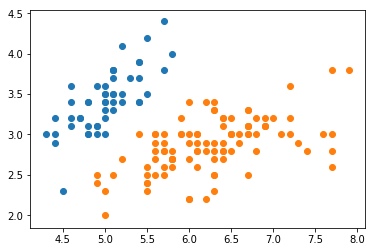

In [71]:
plt.scatter(x[:,0][y == 0.], x[:,1][y == 0.])
plt.scatter(x[:,0][y == 1.], x[:,1][y == 1.])
plt.show()

## Sklearn LogisticRegression

In [72]:
log = LogisticRegression(solver='lbfgs')
log.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
w0 = log.intercept_[0]
wS = log.coef_[0]

print(f'intercept = {w0}')
print(f'slopes    = {wS}')

intercept = -8.323303886430965
slopes    = [ 3.38829757 -3.1645277 ]


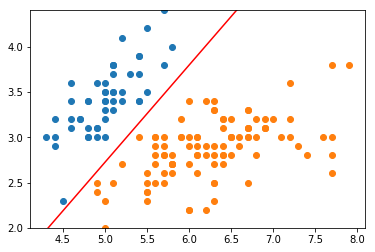

In [106]:
x1 = np.linspace(np.min(x[:,0]), np.max(x[:,0]), num = 10)
y1 = -( wS[0] * x1 + w0)/wS[1]
plt.scatter(x[:,0][y == 0.], x[:,1][y == 0.])
plt.scatter(x[:,0][y == 1.], x[:,1][y == 1.])
plt.plot(x1, y1, '-r')
plt.ylim((np.min(x[:,1]), np.max(x[:,1])))
plt.show()

## Gradient ascent

In [189]:
p = x.shape[1] + 1
n = x.shape[0]
eps = 0.01
eta = 0.01

In [190]:
W = np.zeros((p,))
W

array([0., 0., 0.])

In [191]:
H = np.append(np.ones((n,1)), x, axis=1)
H.shape

(150, 3)

In [192]:
A = 1 / (1 + np.e ** -np.dot(W, H.T))

In [193]:
G = np.dot(y - A, H)

In [194]:
while np.dot(G, G) > eps:
    W = W + eta * G
    A = 1 / (1 + np.e ** -np.dot(W, H.T))
    G = np.dot(y - A, H)

In [195]:
W

array([-19.11491109,  10.50295364, -12.12401395])

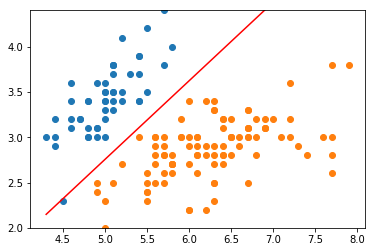

In [196]:
x1 = np.linspace(np.min(x[:,0]), np.max(x[:,0]), num = 10)
y1 = -( W[1] * x1 + W[0])/W[2]
plt.scatter(x[:,0][y == 0.], x[:,1][y == 0.])
plt.scatter(x[:,0][y == 1.], x[:,1][y == 1.])
plt.plot(x1, y1, '-r')
plt.ylim((np.min(x[:,1]), np.max(x[:,1])))
plt.show()